In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


EDA - Exploratory Data Analysis

In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
Blood Pressure              0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


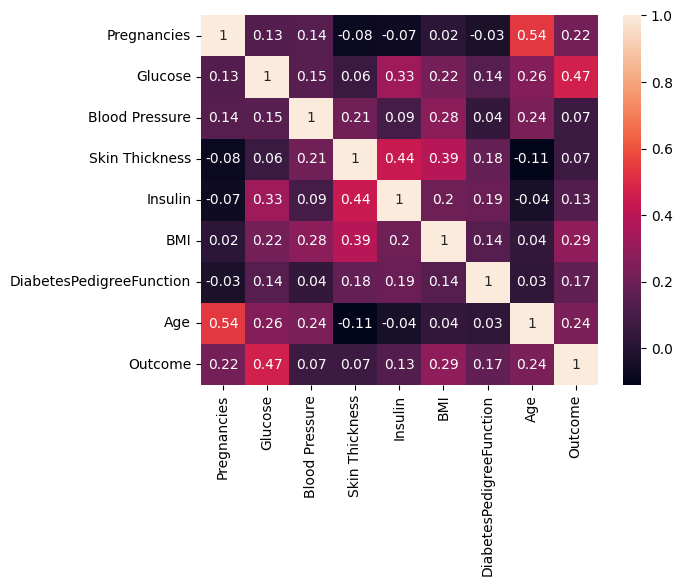

In [6]:
correlation = df.corr().round(2)
sns.heatmap(correlation, annot=True)
plt.show()

In [7]:
df['Pregnancies'].value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

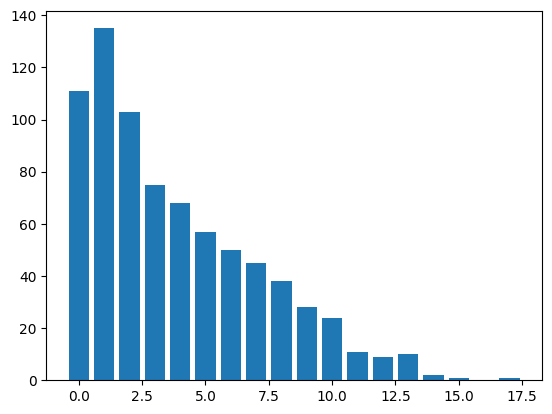

In [8]:
plt.bar(df['Pregnancies'].value_counts().index, df['Pregnancies'].value_counts().values)
plt.show()

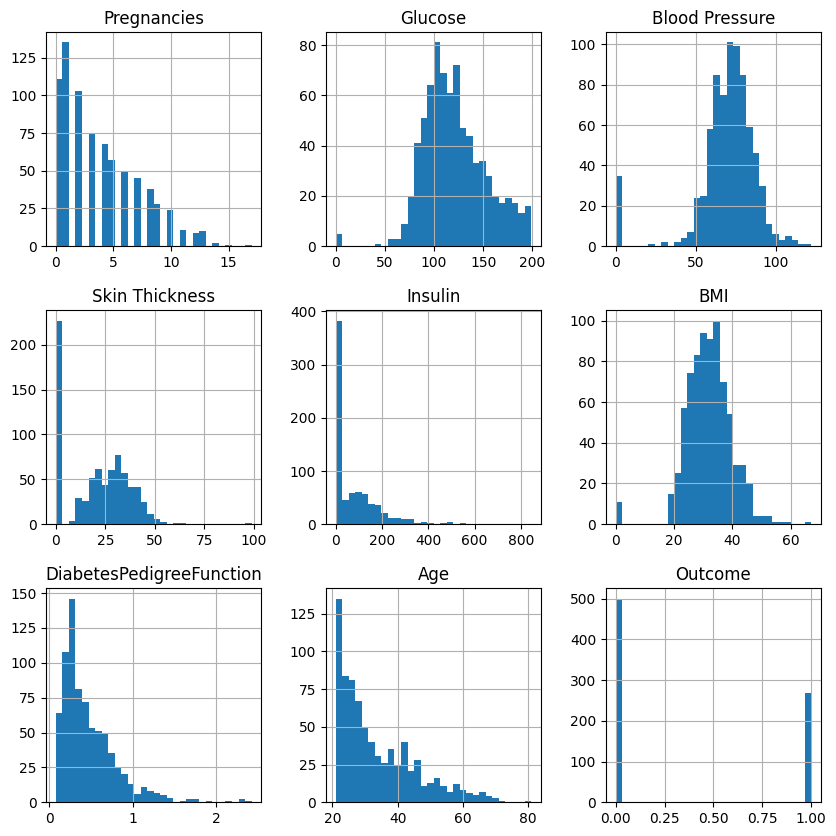

In [9]:
df.hist(figsize=(10, 10), bins=30)
plt.show()

Handling missing values

In [67]:
df[df["Blood Pressure"] == 0]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


In [68]:
df[df["BMI"] == 0]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


In [69]:
df[df["Skin Thickness"] == 0]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


In [70]:
df[(df["Blood Pressure"] == 0) & (df["Skin Thickness"] == 0) & (df["BMI"] == 0)]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
706,10,115,0,0,0,0.0,0.261,30,1


In [71]:
df_to_drop = df[(df["Blood Pressure"] == 0) & (df["Skin Thickness"] == 0) & (df["BMI"] == 0)]
df = df.drop(df_to_drop.index)

In [72]:
df[(df["Blood Pressure"] == 0) & (df["Skin Thickness"] == 0) & (df["BMI"] == 0)]

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


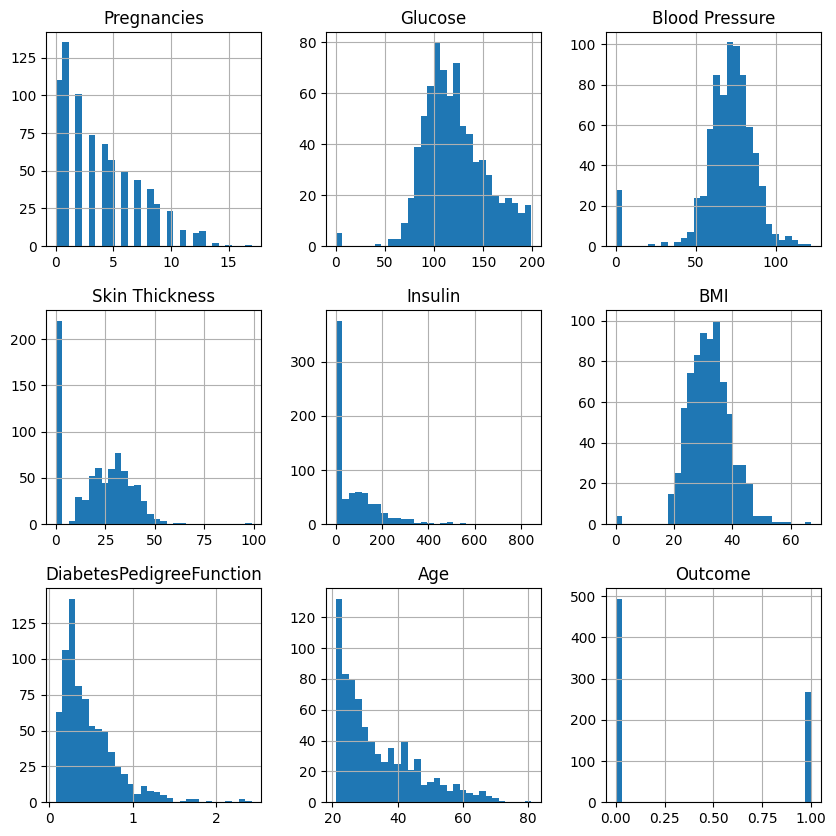

In [73]:
df.hist(figsize=(10, 10), bins=30)
plt.show()

In [74]:
mean = df[df.BMI != 0]["BMI"].mean()
median = df[df.BMI != 0]["BMI"].median()
mode = df[df.BMI != 0]["BMI"].mode()[0]

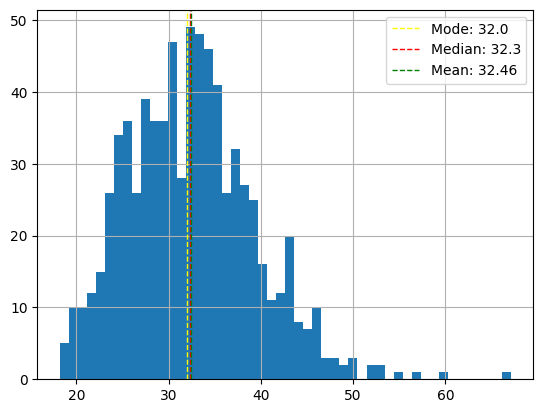

In [75]:
df[df.BMI != 0]["BMI"].hist(bins=50)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)
plt.legend(["Mode: " + str(mode.round(2)), "Median: " + str(median.round(2)), "Mean: " + str(mean.round(2))])
plt.show()

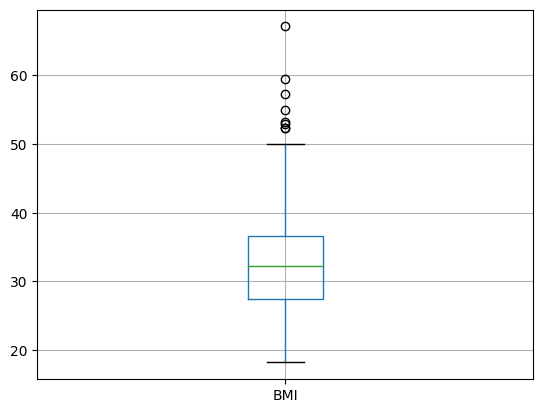

In [76]:
df[df.BMI != 0].boxplot(column=['BMI'])
plt.show()

In [77]:
df["BMI"] = df["BMI"].replace(0, median)

In [78]:
mean = df[df["Blood Pressure"] != 0]["Blood Pressure"].mean()
median = df[df["Blood Pressure"] != 0]["Blood Pressure"].median()
mode = df[df["Blood Pressure"] != 0]["Blood Pressure"].mode()[0]

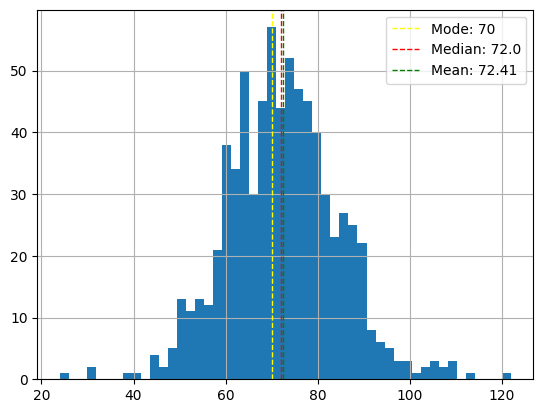

In [79]:
df[df["Blood Pressure"] != 0]["Blood Pressure"].hist(bins=50)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)
plt.legend(["Mode: " + str(mode.round(2)), "Median: " + str(median.round(2)), "Mean: " + str(mean.round(2))])
plt.show()

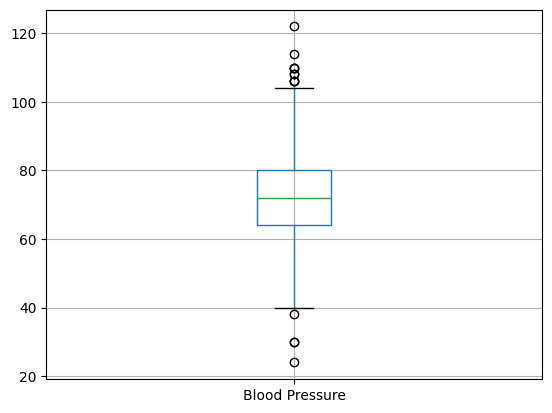

In [80]:
df[df["Blood Pressure"] != 0].boxplot(column=['Blood Pressure'])
plt.show()

In [81]:
df["Blood Pressure"] = df["Blood Pressure"].replace(0, median)

In [82]:
mean = df[df["Glucose"] != 0]["Glucose"].mean()
median = df[df["Glucose"] != 0]["Glucose"].median()
mode = df[df["Glucose"] != 0]["Glucose"].mode()[0]

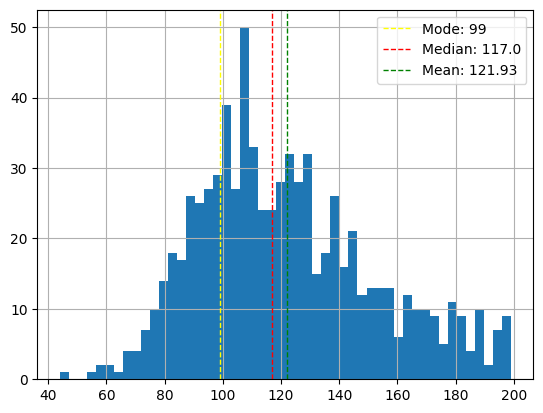

In [83]:
df[df["Glucose"] != 0]["Glucose"].hist(bins=50)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)
plt.legend(["Mode: " + str(mode.round(2)), "Median: " + str(median.round(2)), "Mean: " + str(mean.round(2))])
plt.show()

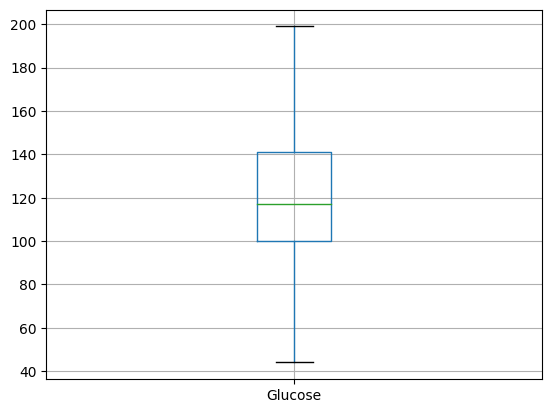

In [84]:
df[df["Glucose"] != 0].boxplot(column=['Glucose'])
plt.show()

In [85]:
df["Glucose"] = df["Glucose"].replace(0, mean)

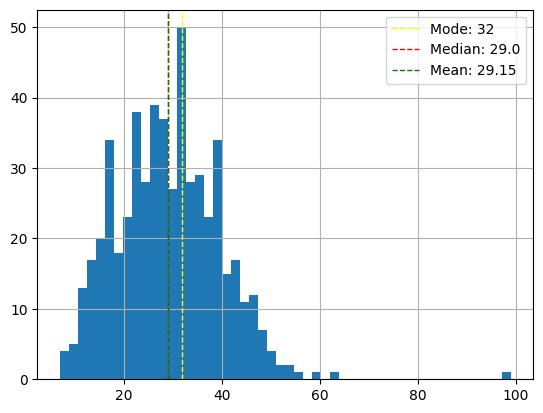

In [86]:
mean = df[df["Skin Thickness"] != 0]["Skin Thickness"].mean()
median = df[df["Skin Thickness"] != 0]["Skin Thickness"].median()
mode = df[df["Skin Thickness"] != 0]["Skin Thickness"].mode()[0]

df[df["Skin Thickness"] != 0]["Skin Thickness"].hist(bins=50)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)
plt.legend(["Mode: " + str(mode.round(2)), "Median: " + str(median.round(2)), "Mean: " + str(mean.round(2))])
plt.show()

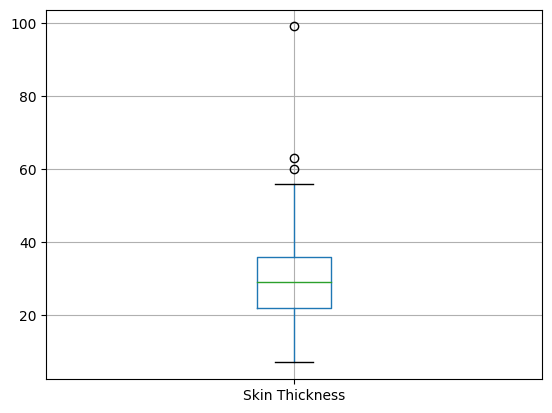

In [87]:
df[df["Skin Thickness"] != 0].boxplot(column=['Skin Thickness'])
plt.show()

In [88]:
df["Skin Thickness"] = df["Skin Thickness"].replace(0, median)

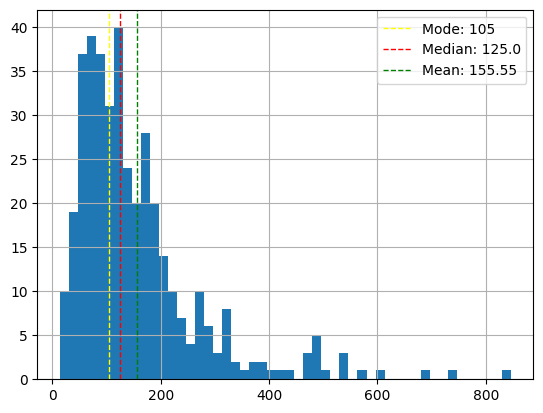

In [89]:
mean = df[df["Insulin"] != 0]["Insulin"].mean()
median = df[df["Insulin"] != 0]["Insulin"].median()
mode = df[df["Insulin"] != 0]["Insulin"].mode()[0]

df[df["Insulin"] != 0]["Insulin"].hist(bins=50)
plt.axvline(mode, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(median, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean, color='green', linestyle='dashed', linewidth=1)
plt.legend(["Mode: " + str(mode.round(2)), "Median: " + str(median.round(2)), "Mean: " + str(mean.round(2))])
plt.show()

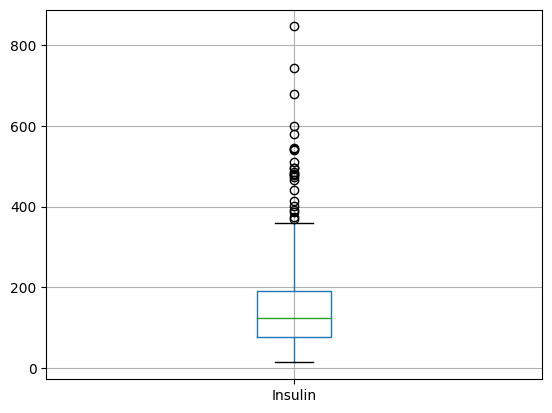

In [90]:
df[df["Insulin"] != 0].boxplot(column=['Insulin'])
plt.show()

In [91]:
df["Insulin"] = df["Insulin"].replace(0, median)

Feature engineering

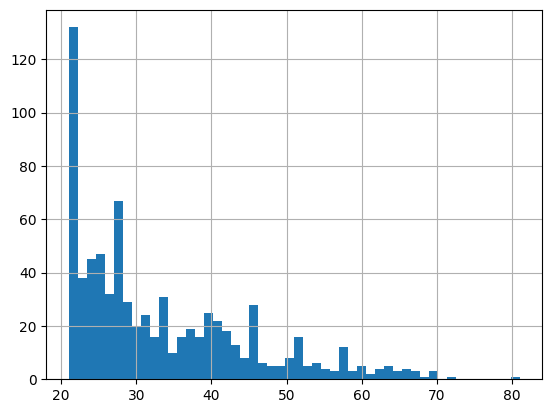

In [92]:
df["Age"].hist(bins=50)
plt.show()

In [93]:
df["AgeClass"] = df.Age.apply(lambda age: 0 if age < 25 else 1 if age < 30 else 2)

In [94]:
df.AgeClass.value_counts()

2    371
0    215
1    175
Name: AgeClass, dtype: int64

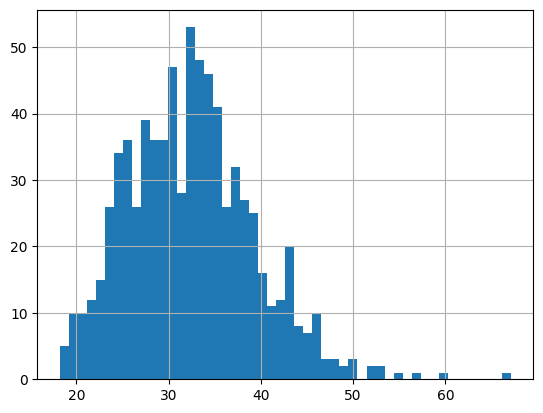

In [95]:
df["BMI"].hist(bins=50)
plt.show()

In [96]:
df.BMI.max(), df.BMI.min()

(67.1, 18.2)

In [97]:
df["BMIClass"] = df.BMI.apply(lambda bmi: 0 if bmi < 25 else 1 if bmi < 30 \
                              else 2 if bmi < 40 else 3 if bmi < 50 else 4)

In [98]:
df["BMIClass"].value_counts()

2    378
1    179
0    106
3     89
4      9
Name: BMIClass, dtype: int64

In [99]:
df

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeClass,BMIClass
0,6,148.0,72,35,125,33.6,0.627,50,1,2,2
1,1,85.0,66,29,125,26.6,0.351,31,0,2,1
2,8,183.0,64,29,125,23.3,0.672,32,1,2,0
3,1,89.0,66,23,94,28.1,0.167,21,0,0,1
4,0,137.0,40,35,168,43.1,2.288,33,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180,32.9,0.171,63,0,2,2
764,2,122.0,70,27,125,36.8,0.340,27,0,1,2
765,5,121.0,72,23,112,26.2,0.245,30,0,2,1
766,1,126.0,60,29,125,30.1,0.349,47,1,2,2


In [100]:
correlation_after = df.corr().round(2)

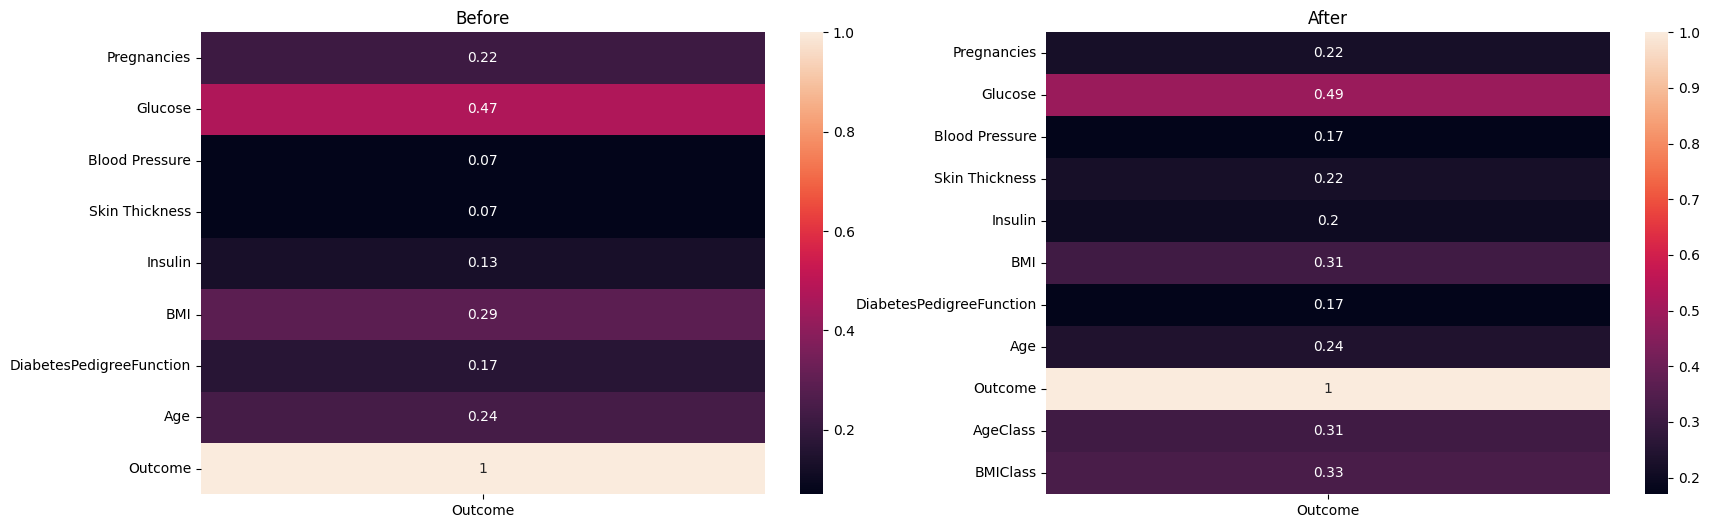

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))
sns.heatmap(correlation[["Outcome"]], annot=True, ax=ax1)
sns.heatmap(correlation_after[["Outcome"]], annot=True, ax=ax2)
ax1.set_title("Before")
ax2.set_title("After")
plt.show()

SMOTE and Normalization

In [102]:
df["Outcome"].value_counts()

0    494
1    267
Name: Outcome, dtype: int64

In [103]:
smote = SMOTE(random_state=42)
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X, y = smote.fit_resample(X, y)

In [104]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Modeling

In [106]:
model = RandomForestClassifier(random_state=42)

In [107]:
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [108]:
y_pred = model.predict(X_test)

In [109]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8380566801619433
Precision: 0.813953488372093
Recall: 0.8677685950413223
F1 Score: 0.84


In [110]:
conf = confusion_matrix(y_test, y_pred)
pd.DataFrame(conf, index=["Actual Negative", "Actual Positive"], columns=["Predicted Negative", "Predicted positive"])

,Predicted Negative,Predicted positive
Actual Negative,102,24
Actual Positive,16,105


Hyperparameter tuning

In [ ]:
params = {
    "n_estimators": [100, 300, 500],
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 5, None],
    "min_samples_split": [2, 3, 4, 5, 6, 7],
    "min_samples_leaf": [1, 2, 3, 4]
}

In [111]:
max_f1 = 0
for n_est in params["n_estimators"]:
    for crit in params["criterion"]:
        for max_depth in params["max_depth"]:
            for min_split in params["min_samples_split"]:
                for min_leaf in params["min_samples_leaf"]:
                    model = RandomForestClassifier(n_estimators=n_est, criterion=crit, max_depth=max_depth,
                                                   min_samples_split=min_split, min_samples_leaf=min_leaf,
                                                   random_state=42)
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    f1 = f1_score(y_test, y_pred)
                    if f1 > max_f1:
                        max_f1 = f1
                        best_params = {"n_estimators": n_est, "criterion": crit, "max_depth": max_depth,
                                       "min_samples_split": min_split, "min_samples_leaf": min_leaf}
                        best_model = model

In [112]:
best_params

{'n_estimators': 300,
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 2}

In [113]:
y_pred = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8421052631578947
Precision: 0.8106060606060606
Recall: 0.8842975206611571
F1 Score: 0.8458498023715415
